###                                  <center> CSE321 Algorithms  <center>
###                                               <center> Homework 5 </center>
###                                    <center>   Harlinton Palacios Mosquera </center>
                                   
###                                       <center>  ID: 161041033  </center>                                        
                             

## 1-)

Propose a greedy algorithm to solve this problem. That is, you are given a set of n jobs with a
processing time ti and a weight wi for each job. You want to order the jobs to minimize the
weighted sum of the completion times, ∑ 𝑊𝑖,𝐶𝑖.

Minimizing total weighted completion time: We want to schedule jobs from n customers.

Each customer has 1 job.

Customer i has job i.

Job i takes ti time, completed at time ci.

There are different order of schedule algorithm, for this case we are going to use Order in decreasing weight

Note: In this algorithm we used a Jobs.txt, which contain the jobs: like as follew 

| NumberJosb |
|------------|
|         |
|Weight--Time  |
|     |

###  Complexity Time: 
O(n log n) elementary operations

In [7]:
##Load a jobs data
jobsFile = open('jobs.txt','r')

lines = jobsFile.readlines()[1:]

jobs = []
sumTime = 0
presum = 0
time = 0
weight = 0
#print all set of jabs that we have in text docuement

print("\nSet Of Jobs")

#Split the values weight and  time    
    
for i in lines:
    weight = int(i.split()[0])
    time = int(i.split()[1])
    jobs.append([weight,time,float(weight) / float(time)])
    print("\nweight:",weight)
    print("Time : ",time)    
    print("_________________")

jobs = sorted(jobs,key = lambda x:x[2])

# Order in decreasing weight
#print(jobs)
jobs = jobs[-1::-1]


Set Of Jobs

weight: 10
Time :  1
_________________

weight: 2
Time :  3
_________________


In [3]:
for job in jobs:
    presum += job[1]
    sumTime += job[0] * presum
    
print("Weighted completion time is:",sumTime)

Weighted completion time is: 18


## 2-)
Suppose you're running a lightweight consulting business ---
just you, two associates, and some rented equipment.
Your clients are distributed between the East Coast and
the West Coast, and this leads to the following question.

Each month, you can either run your business from an office
in New York (NY), or from an office in San Francisco (SF).
In month $i$, you'll incur an {\em operating cost} of $N_i$
if you run the business out of NY; you'll
incur an operating cost of $S_i$
if you run the business out of SF.
(It depends on the distribution of client demands for that month.)

However, if you run the business out of one city in
month $i$, and then out of the other city in month $i + 1$,
then you incur a fixed {\em moving cost} of $M$
to switch base offices.

Given a sequence of $n$ months, a {\em plan} is
a sequence of $n$ locations --- each one equal to either NY or SF ---
such that the $i^{\rm th}$ location indicates the
city in which you will be based in the $i^{\rm th}$ month.
The {\em cost} of a plan is the sum of the operating costs
for each of the $n$ months, plus a moving cost of $M$
for each time you switch cities.
The plan can begin in either city.

### a) 
Show that the following algorithm does not correctly solve this problem by giving an instance
which it does not return the correct answer.

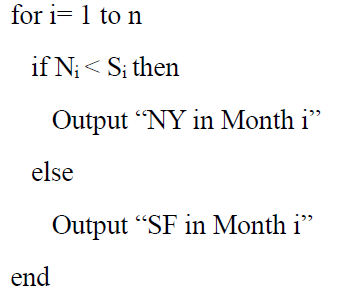


## Solution:
Suppose that,

<b>M</b> = 10

<b>N</b> = 3

<b>{N1,N2,N3}</b> = {1,4,1} 

<b>{S1,S2,S3} </b>= {20,1,20}.


| # | Month1 | Month2 | Month3
| --- | --- | --- |
| <b>NY</b> | 1 | 4 | 1 |
| <b>SF</b> | 20 | 1 | 20 |
|<img width=100/>|<img width=200/>|<img width=200/>|<img width=200/>|

When performing a desktop test with this data in previously planted algorithm. This algorithm returns this plan of minimum cost : <b> [NY,SF,NY]</b>

With a total cost of <b> 1 + 1 + 1 + 10 = 13 </b>, where the final term of 10 arises because you change
locations once. <b>So is not optimal </b>

But we can get a better optimal plan, which would be <b> [NY,NY,NY]</b> with a total cost <b> 1+4+1 = 6 </b>, whituot change locations.

Therefore this algorithm no gives a optimal plan.


### b)   
Propose a dynamic programming algorithm that takes values for n, M, and sequences of operating costs N1 ..... Nn and Sl .....Sn, and returns the cost of an optimal plan


### Complexity Time: 

The algorithm below has an interactions, and each takes cosntant time.
Thus tha running time is <b> O(n)</b>


In [8]:
def minimumcost(sequenceS,sequenceN, m):
    ss = sequenceS
    sn = sequenceN
    #Array to get result of the cost
    optn = [0 for x in range(len(ss))]
    opts = [0 for x in range(len(ss))]
    
    for i in range(0,len(ss)): 
        
        #computer the costs 
        optn[i]= sn[i] + min(optn[i-1], m + opts[i-1])
        opts[i]= ss[i] + min(opts[i-1], m + optn[i-1])     
        
        # Return the minimum cost plan
    return min(opts[i],optn[i])

# In this example the total cost is 24 but and it moves trees times.
#n=[1,100,1,100]
#s=[100,1,100,1]

# This values in the a) part 
#n=[1,4,1]
#s=[20,1,20]

#This the homework example
n=[1,3,20,30]
s=[50,20,2,4]
m=10
    
print("The cost of an optimal plan : ",minimumcost(s,n,m) )

The cost of an optimal plan :  20
